## Random Forest Regression vs Graussian Process Regression 
This notebook, prepared for MIT course 2s986 (Fall 2020), provides regression examples for:
- Random Forest Regrssion <https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html>  
- Gaussian Process Regression <https://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process>





In [53]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, Matern
import matplotlib.pyplot as plt

### Dataset 1 - Sine Funtion 
The first dataset we will be examining is sampling $f(x) = \sin(x)$


#### Small Dataset (10 points)

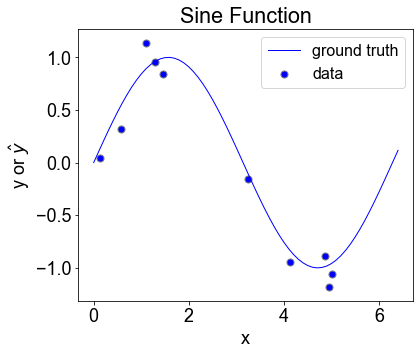

In [54]:
# Create a random dataset
rng = np.random.RandomState(10)
X_end = 6.5
X_train = np.sort(X_end * rng.rand(10, 1), axis=0)
X_test = np.arange(0.0, X_end, 0.1)[:, np.newaxis]

y_train = np.sin(X_train).ravel()
y_train += 0.5 * (0.5 - rng.rand(len(X_train)))
y_test = np.sin(X_test).ravel()

plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
# Plot the results
plt.figure(figsize=(6, 5))
plt.scatter(X_train, y_train, s=50, edgecolor="gray", c="blue", label="data")
plt.plot(X_test, y_test, color="blue", label="ground truth", linewidth=1)
plt.xlabel("x")
plt.ylabel(r"y or $\^y$")
plt.title("Sine Function")
plt.legend(fontsize = 16)
plt.show()

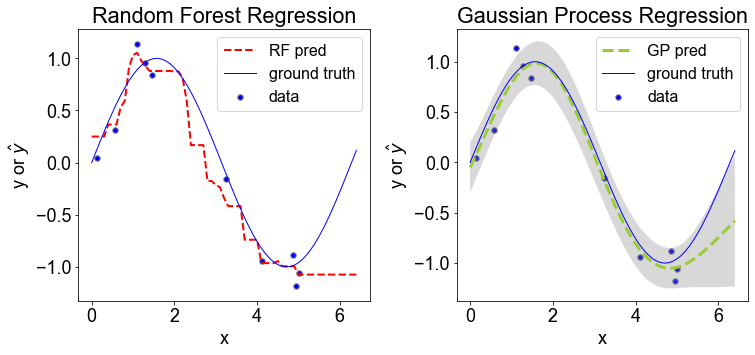

In [55]:
# Fit Random Forest regression model
regr_RF = RandomForestRegressor()
regr_RF.fit(X_train, y_train)
y_test_RFpred = regr_RF.predict(X_test)

gp_kernel = RBF() + WhiteKernel()
regr_GP = GaussianProcessRegressor(kernel=gp_kernel)
regr_GP.fit(X_train, y_train)
y_test_GPpred, y_test_GPstd = regr_GP.predict(X_test, return_std=True)


plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].plot(X_test, y_test_RFpred, '--', color="red", label="RF pred", linewidth=2)
axes[1].plot(X_test, y_test_GPpred, '--', color="yellowgreen", label="GP pred", linewidth=3)
axes[1].fill(np.concatenate([X_test, X_test[::-1]]),
             np.concatenate([y_test_GPpred - y_test_GPstd,
                            (y_test_GPpred + y_test_GPstd)[::-1]]), alpha=.3, fc='gray', ec='None')

for i in range(len(axes)):
    axes[i].scatter(X_train, y_train, s=30, edgecolor="gray", c="blue", label="data")
    axes[i].plot(X_test, y_test, color="blue", label="ground truth", linewidth=1)
    axes[i].set_xlabel("x")
    axes[i].set_ylabel(r"y or $\^y$")
    axes[i].legend(fontsize = 16)
    
axes[0].set_title("Random Forest Regression")
axes[1].set_title("Gaussian Process Regression")

plt.subplots_adjust(wspace = 0.3)
plt.show()


In [56]:
from sklearn.metrics import mean_squared_error
def plot_predictions(y, y_hat, labels):
 
  
    plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
    y, y_hat, labels = list(
        map(
            lambda l: l if isinstance(l, list) else [l],
            [y, y_hat, labels]))
    color_list = ['blue', 'red']
    n_plots = len(y)
    y_min = min([min(z) for z in y])
    y_max = max([max(z) for z in y])
    lims = (y_min, y_max)
    fig, ax = plt.subplots(
        1, n_plots, figsize=(6*n_plots, 5),
        squeeze=False, sharex=True, sharey=True)
    for axis, target, prediction, label, color in zip(ax[0, :], y, y_hat, labels, color_list):
        # Scatter plot
        axis.scatter(target, prediction, alpha=0.3, c = color)

        # Title and labels
        rmse_value = np.sqrt(mean_squared_error(target, prediction))
        title = label + " (RMSE=%.3f)" % rmse_value
        axis.set_title(title)
        axis.set_xlabel('Ground Truth)')
        axis.set_ylabel('Prediction')
        axis.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
        axis.yaxis.set_tick_params(which='both', labelleft=True)

    plt.subplots_adjust(wspace = 0.3)
    plt.show()


Test data root mean squared error:


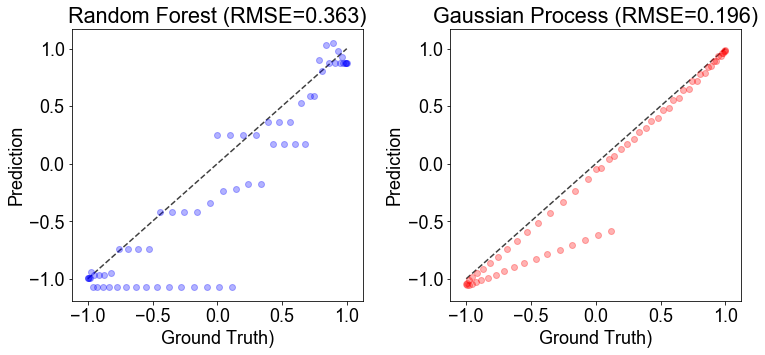

In [57]:
print('Test data root mean squared error:' )
plot_predictions([y_test, y_test], [y_test_RFpred, y_test_GPpred],    labels=['Random Forest', 'Gaussian Process'])

#### Larger Dataset (100 points)

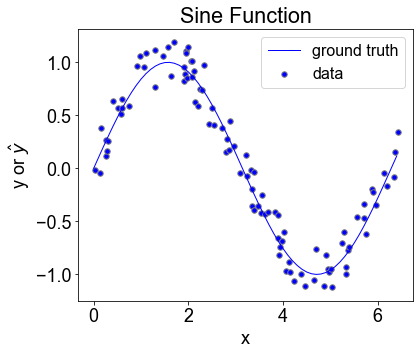

In [58]:
# Create a random dataset
rng = np.random.RandomState(10)
X_end = 6.5
X_train = np.sort(X_end * rng.rand(100, 1), axis=0)
X_test = np.arange(0.0, X_end, 0.1)[:, np.newaxis]

y_train = np.sin(X_train).ravel()
y_train += 0.5 * (0.5 - rng.rand(len(X_train)))
y_test = np.sin(X_test).ravel()


plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
# Plot the results
plt.figure(figsize=(6, 5))
plt.scatter(X_train, y_train, s=30, edgecolor="gray", c="blue", label="data")
plt.plot(X_test, y_test, color="blue", label="ground truth", linewidth=1)
plt.xlabel("x")
plt.ylabel(r"y or $\^y$")
plt.title("Sine Function")
plt.legend(fontsize = 16)
plt.show()

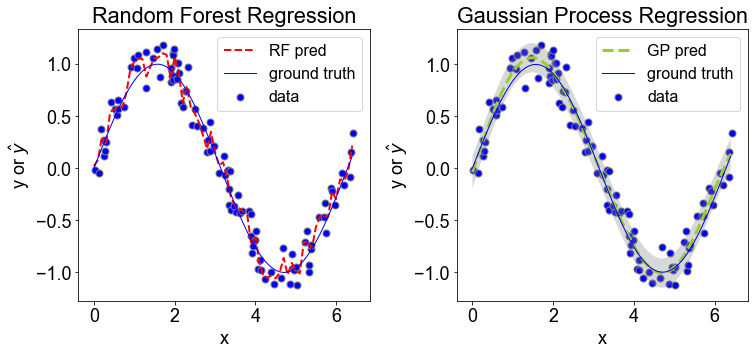

In [59]:
# Fit Random Forest regression model
regr_RF = RandomForestRegressor()
regr_RF.fit(X_train, y_train)
y_test_RFpred = regr_RF.predict(X_test)

gp_kernel = RBF() + WhiteKernel()
regr_GP = GaussianProcessRegressor(kernel=gp_kernel)
regr_GP.fit(X_train, y_train)
y_test_GPpred, y_test_GPstd = regr_GP.predict(X_test, return_std=True)



plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].plot(X_test, y_test_RFpred, '--', color="red", label="RF pred", linewidth=2)
axes[1].plot(X_test, y_test_GPpred, '--', color="yellowgreen", label="GP pred", linewidth=3)
axes[1].fill(np.concatenate([X_test, X_test[::-1]]),
             np.concatenate([y_test_GPpred - y_test_GPstd,
                            (y_test_GPpred + y_test_GPstd)[::-1]]), alpha=.3, fc='gray', ec='None')

for i in range(len(axes)):
    axes[i].scatter(X_train, y_train, s=50, edgecolor="gray", c="blue", label="data")
    axes[i].plot(X_test, y_test, color="blue", label="ground truth", linewidth=1)
    axes[i].set_xlabel("x")
    axes[i].set_ylabel(r"y or $\^y$")
    axes[i].legend(fontsize = 16)
    
axes[0].set_title("Random Forest Regression")
axes[1].set_title("Gaussian Process Regression")

plt.subplots_adjust(wspace = 0.3)
plt.show()


Test data root mean squared error:


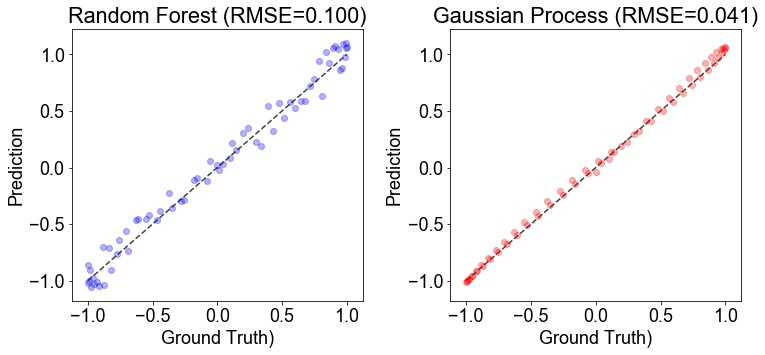

In [60]:
print('Test data root mean squared error:' )
plot_predictions([y_test, y_test], [y_test_RFpred, y_test_GPpred],    labels=['Random Forest', 'Gaussian Process'])

### Dataset 2 - Phase transition dataset


The second dataset we will be examining is sampling the distribution of specific heat ($c(T)$) vs temperature ($T$) during phase transition. Following the Landau theory, the specific heat can be discribed as follows:
\begin{cases} 
      a*T + \epsilon ,& T<T_{c} \\
      0 +\epsilon,& T>T_{c}  
   \end{cases}


where $a$ is some coefficient, $\epsilon$ is a normally distributed experimental noise. Our goal is to **approximate** this function $c(T)$ by both Random Forest and Gaussian Process regression.


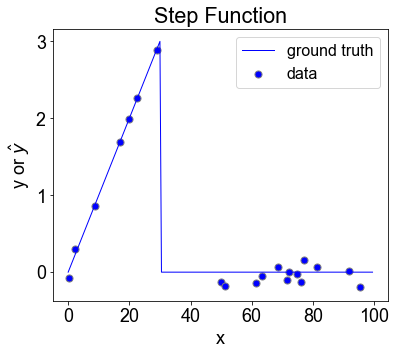

In [92]:
rng = np.random.RandomState(10)
def step_function(T, Tc, a , eps):
    y = []
    for i in T: 
        if i <= Tc:
            y.append (a*i + eps*np.random.normal (0,1, 1))
        else: 
            y.append (eps*np.random.normal (0,1, 1))
    return np.array(y)        
    
X_train = np.sort(100* rng.rand(20, 1), axis=0)
y_train = step_function (X_train, Tc= 30, a = 0.1 , eps = 0.1)
y_train = y_train.ravel()
X_test = np.arange(0.0, 100, 0.5)[:, np.newaxis]
y_test = step_function (X_test, Tc= 30, a = 0.1 , eps = 0)
y_train = y_train.ravel()


plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
# Plot the results
plt.figure(figsize=(6, 5))
plt.scatter(X_train, y_train, s=50, edgecolor="gray", c="blue", label="data")
plt.plot(X_test, y_test, color="blue", label="ground truth", linewidth=1)
plt.xlabel("x")
plt.ylabel(r"y or $\^y$")
plt.title("Step Function")
plt.legend(fontsize = 16)
plt.show()

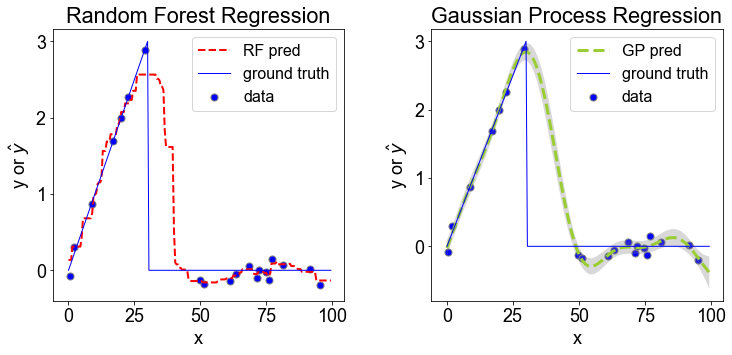

In [93]:
# Fit Random Forest regression model
regr_RF = RandomForestRegressor()
regr_RF.fit(X_train, y_train)
y_test_RFpred = regr_RF.predict(X_test)

gp_kernel = RBF() + WhiteKernel()
regr_GP = GaussianProcessRegressor(kernel=gp_kernel)
regr_GP.fit(X_train, y_train)
y_test_GPpred, y_test_GPstd = regr_GP.predict(X_test, return_std=True)


plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].plot(X_test, y_test_RFpred, '--', color="red", label="RF pred", linewidth=2)
axes[1].plot(X_test, y_test_GPpred, '--', color="yellowgreen", label="GP pred", linewidth=3)
axes[1].fill(np.concatenate([X_test, X_test[::-1]]),
             np.concatenate([y_test_GPpred - y_test_GPstd,
                            (y_test_GPpred + y_test_GPstd)[::-1]]), alpha=.3, fc='gray', ec='None')

for i in range(len(axes)):
    axes[i].scatter(X_train, y_train, s=50, edgecolor="gray", c="blue", label="data")
    axes[i].plot(X_test, y_test, color="blue", label="ground truth", linewidth=1)
    axes[i].set_xlabel("x")
    axes[i].set_ylabel(r"y or $\^y$")
    axes[i].legend(fontsize = 16)
    
axes[0].set_title("Random Forest Regression")
axes[1].set_title("Gaussian Process Regression")

plt.subplots_adjust(wspace = 0.3)
plt.show()


Test data root mean squared error:


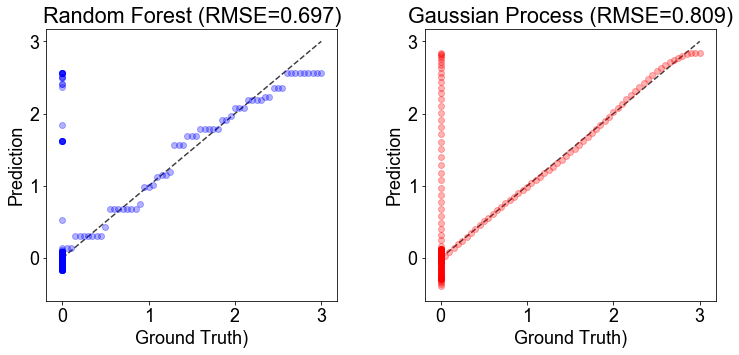

In [94]:
print('Test data root mean squared error:' )
plot_predictions([y_test, y_test], [y_test_RFpred, y_test_GPpred],    labels=['Random Forest', 'Gaussian Process'])

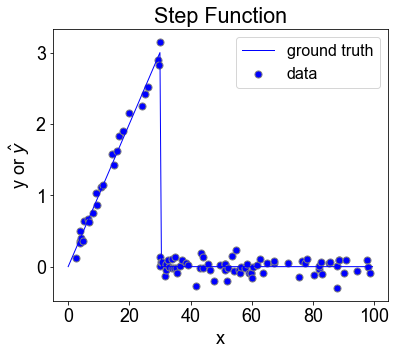

In [64]:
X_train = np.sort(100* rng.rand(100, 1), axis=0)
y_train = step_function (X_train, Tc= 30, a = 0.1 , eps = 0.1)
y_train = y_train.ravel()
X_test = np.arange(0.0, 100, 0.5)[:, np.newaxis]
y_test = step_function (X_test, Tc= 30, a = 0.1 , eps = 0)
y_train = y_train.ravel()


plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
# Plot the results
plt.figure(figsize=(6, 5))
plt.scatter(X_train, y_train, s=50, edgecolor="gray", c="blue", label="data")
plt.plot(X_test, y_test, color="blue", label="ground truth", linewidth=1)
plt.xlabel("x")
plt.ylabel(r"y or $\^y$")
plt.title("Step Function")
plt.legend(fontsize = 16)
plt.show()

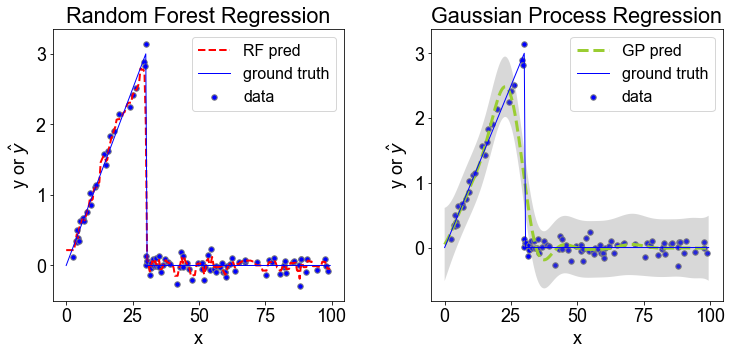

In [65]:
# Fit Random Forest regression model
regr_RF = RandomForestRegressor()
regr_RF.fit(X_train, y_train)
y_test_RFpred = regr_RF.predict(X_test)

gp_kernel = RBF() + WhiteKernel()
regr_GP = GaussianProcessRegressor(kernel=gp_kernel)
regr_GP.fit(X_train, y_train)
y_test_GPpred, y_test_GPstd = regr_GP.predict(X_test, return_std=True)


plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].plot(X_test, y_test_RFpred, '--', color="red", label="RF pred", linewidth=2)
axes[1].plot(X_test, y_test_GPpred, '--', color="yellowgreen", label="GP pred", linewidth=3)
axes[1].fill(np.concatenate([X_test, X_test[::-1]]),
             np.concatenate([y_test_GPpred - y_test_GPstd,
                            (y_test_GPpred + y_test_GPstd)[::-1]]), alpha=.3, fc='gray', ec='None')

for i in range(len(axes)):
    axes[i].scatter(X_train, y_train, s=30, edgecolor="gray", c="blue", label="data")
    axes[i].plot(X_test, y_test, color="blue", label="ground truth", linewidth=1)
    axes[i].set_xlabel("x")
    axes[i].set_ylabel(r"y or $\^y$")
    axes[i].legend(fontsize = 16)
    
axes[0].set_title("Random Forest Regression")
axes[1].set_title("Gaussian Process Regression")

plt.subplots_adjust(wspace = 0.3)
plt.show()


Test data root mean squared error:


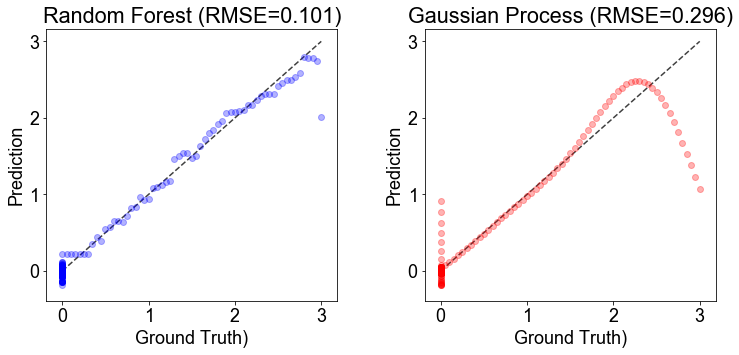

In [66]:
print('Test data root mean squared error:' )
plot_predictions([y_test, y_test], [y_test_RFpred, y_test_GPpred],    labels=['Random Forest', 'Gaussian Process'])

### Dataset 3 - Polymer Cloudpoint transition temperature dataset

The dataset is based on this published [article](https://www.nature.com/articles/s41524-019-0209-9). Literature data is used as training/validation set. Our experimental data is used as a test set.

In [67]:
import pandas as pd
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
with open('./data/literature_data.json', 'r') as file:
    data = pd.read_json(json.load(file), orient='table')
    
data

,No,Units of A,Units of B,Units of C,Units of D,Units of E,Mp,Cloud Point
4,5,100.0,0.0,0,0.000000,0,6700.0,90.6
5,6,150.0,0.0,0,0.000000,0,9000.0,85.3
6,7,200.0,0.0,0,0.000000,0,13300.0,78.3
7,8,300.0,0.0,0,0.000000,0,21000.0,73.5
8,9,500.0,0.0,0,0.000000,0,37300.0,69.3
...,...,...,...,...,...,...,...,...
79,80,0.0,0.0,0,41.000000,0,4600.0,51.3
80,81,0.0,0.0,0,50.000000,0,5650.0,48.1
81,82,0.0,0.0,0,37.999293,0,4300.0,43.7
82,83,0.0,0.0,0,68.928950,0,7800.0,38.7


In [68]:
with open('./data/experimental_data.json', 'r') as file:
    exp_data = pd.read_json(json.load(file), orient='table')
exp_data

,No,Units of A,Units of B,Units of C,Units of D,Units of E,Mp,Cloud Point
8,9,158.024816,0.000000,0.000000,0.000000,0,15665,87.50
9,10,90.991627,0.000000,0.000000,0.000000,0,9020,88.50
10,11,170.654696,0.000000,0.000000,0.000000,0,16917,86.30
13,14,434.601029,0.000000,0.000000,0.000000,0,43082,60.75
14,15,388.439423,0.000000,0.000000,0.000000,0,38506,61.50
15,16,208.352668,0.000000,0.000000,0.000000,0,20654,65.50
16,17,129.787136,14.741969,0.000000,0.000000,0,14534,74.50
17,18,104.863750,16.506331,0.000000,0.000000,0,12263,71.25
18,19,71.687638,7.481482,0.000000,0.000000,0,7953,75.00
19,20,55.119485,15.456040,0.000000,0.000000,0,7213,66.00


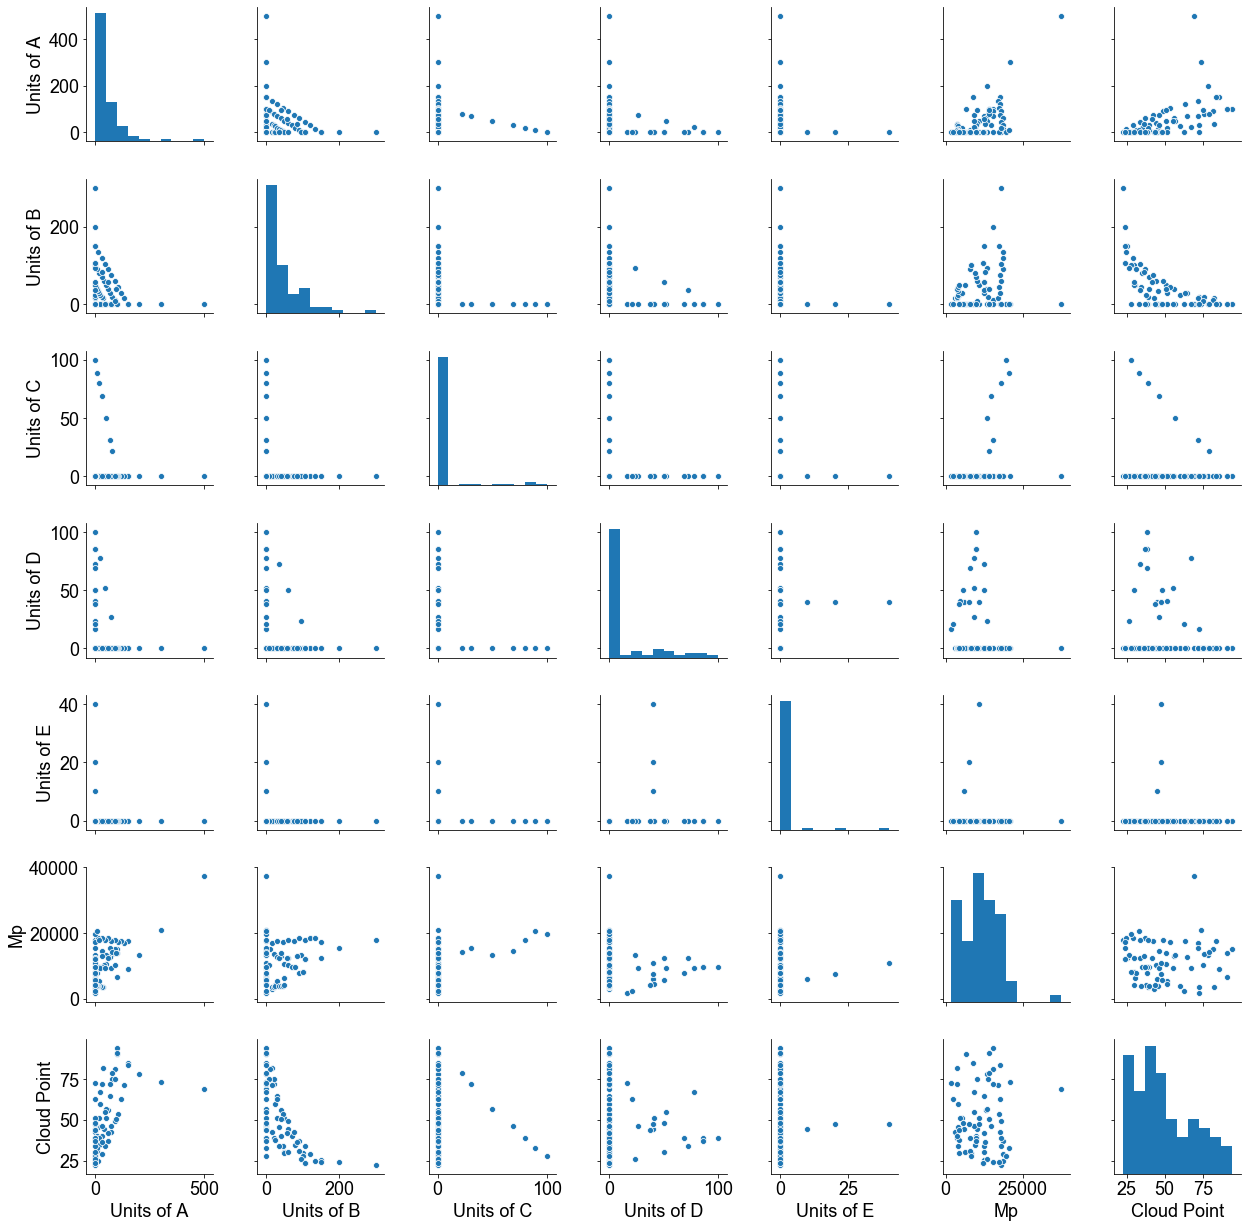

In [69]:
import seaborn as sns

sns.pairplot(data.iloc[:,1:])

#### Train-test split

Here, we use the literature data as our training dataset. Our experimental data is used as a test set. This way, if the test error is sufficiently low then this justifies combining our datasets.

In [70]:
X_train = np.asarray(data.iloc[:,1:-1])

y_train = np.asarray(data['Cloud Point'])
X_test = np.asarray(exp_data.loc[:,'Units of A':'Mp'])
y_test = np.asarray(exp_data['Cloud Point'])

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Test data root mean squared error:


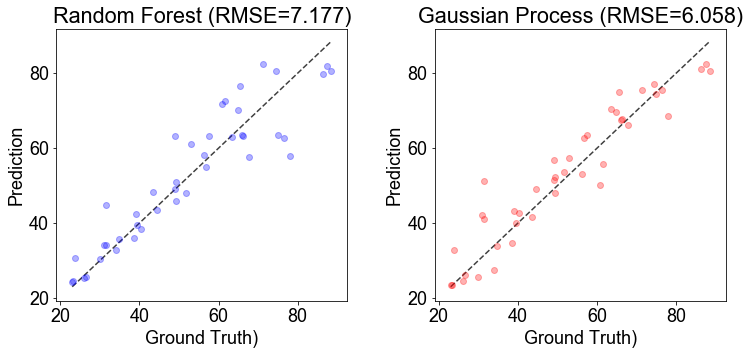

In [71]:
regr_RF = RandomForestRegressor()
regr_RF.fit(X_train, y_train)
y_test_RFpred = regr_RF.predict(X_test)

regr_GP = GaussianProcessRegressor(alpha=0.2,  kernel=RBF() )
regr_GP.fit(X_train, y_train)
y_test_GPpred, y_test_GPstd = regr_GP.predict(X_test, return_std=True)

print('Test data root mean squared error:' )
plot_predictions([y_test, y_test], [y_test_RFpred, y_test_GPpred],    labels=['Random Forest', 'Gaussian Process'])


Looks like both RF and GPR performs quite well in fitting the polymer dataset. Let's reduce the number of data points by randomly sampling  10 data points in the training dataset

In [90]:
num_data = 10

data_sampled = data.sample(num_data )
X_train = np.asarray(data_sampled.loc[:,'Units of A':'Mp'])

y_train = np.asarray(data_sampled['Cloud Point'])
X_test = np.asarray(exp_data.loc[:,'Units of A':'Mp'])
y_test = np.asarray(exp_data['Cloud Point'])

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Test data root mean squared error:


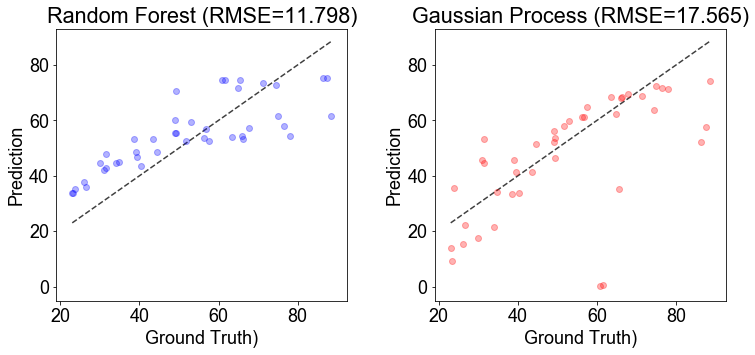

In [91]:
regr_RF = RandomForestRegressor()
regr_RF.fit(X_train, y_train)
y_test_RFpred = regr_RF.predict(X_test)

regr_GP = GaussianProcessRegressor(alpha=0.2,  kernel=RBF() )
regr_GP.fit(X_train, y_train)
y_test_GPpred, y_test_GPstd = regr_GP.predict(X_test, return_std=True)

print('Test data root mean squared error:' )
plot_predictions([y_test, y_test], [y_test_RFpred, y_test_GPpred],    labels=['Random Forest', 'Gaussian Process'])


We can visualize the RF and GPR manifold. Let's first define the important dimensions using feature importance 

 0) Units of A                     0.592613
 1) Units of B                     0.271400
 2) Mp                             0.107679
 3) Units of D                     0.018791
 4) Units of C                     0.008314
 5) Units of E                     0.001203


Text(0.5, 1.0, 'Variable Importance')

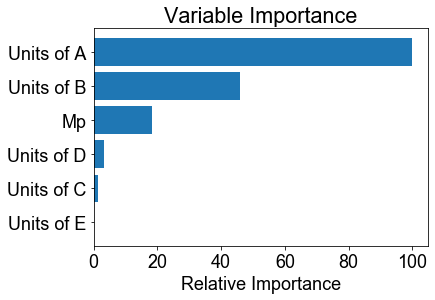

In [74]:
X_train = np.asarray(data.iloc[:,1:-1])

y_train = np.asarray(data['Cloud Point'])
X_test = np.asarray(exp_data.loc[:,'Units of A':'Mp'])
y_test = np.asarray(exp_data['Cloud Point'])

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
regr_RF = RandomForestRegressor()
regr_RF.fit(X_train, y_train)

importances=regr_RF.feature_importances_

feat_labels = data.columns[1:-1]
indices=np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print ('%2d) %-*s %f'%(f,30,feat_labels[indices[f]],importances[indices[f]]))


coefs=regr_RF.feature_importances_


# make importances relative to max importance
feature_importance = abs(100.0 * (coefs / abs(coefs).max()))
sorted_idx = np.argsort(feature_importance)[-10:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure()
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,feat_labels[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

The RF feature importance values shown in this example differs slightly from values obtained using GBDT in the original study. This may come from different algorithm and they perform an ensemble of feature importances. 

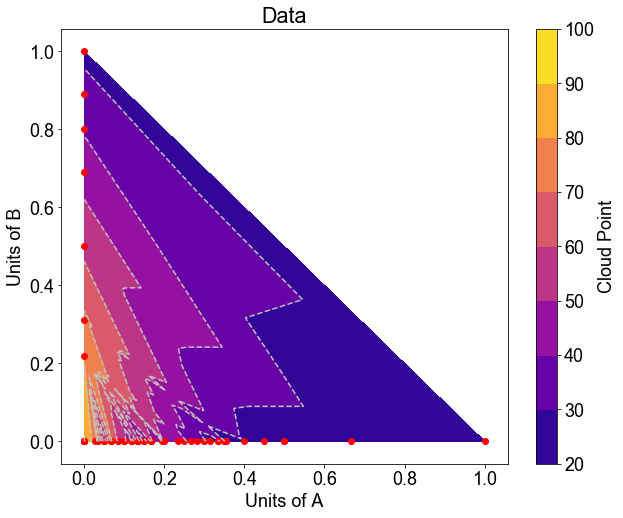

In [75]:
fig = plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 18})

plt.tricontour(X_train[:,1],X_train[:,2],y_train,linestyles='dashed',colors='silver')

plt.tricontourf(X_train[:,1],X_train[:,2],y_train,cmap='plasma')

plt.xlabel('Units of A')
plt.ylabel('Units of B')
cbar = plt.colorbar()
plt.scatter (X_train[:,1],X_train[:,2],c='red')
plt.title ('Data')
cbar.set_label('Cloud Point')

#### Response map visualization 
The above relationship visualization is purely based on existing data. We can also visualize the surrogate model (response map) between input variables and output variables. The basic procedures are :
1. Create a mesh-grid for input variables
2. Train a surrogate regression model
3. Predict the output values for each point of the mesh-grid
4. Plot the predicted values vs the mesh-grid



In [76]:
x_grid = np.linspace(0,1,20)


gx1, gx2  = np.meshgrid(x_grid, x_grid)

In [77]:
mesh= []

for i in range(len(x_grid)):
    for j in range(len(x_grid)): 
        for m in range(len(x_grid)):           
  
            mesh.append([x_grid[i],x_grid[j],x_grid[m]])

mesh = np.array(mesh) 

In [78]:
regr_RF.fit(X_train[:,[0,1,-1]], y_train)
regr_GP.fit(X_train[:,[0,1,-1]], y_train)

RF_y = regr_RF.predict (mesh)
GP_y = regr_GP.predict (mesh)

In [79]:
bbb=np.mean(RF_y.reshape(20,20,20),axis=-1)

In [80]:
bbb.shape

(20, 20)

Text(0.5, 1.0, 'GP manifold')

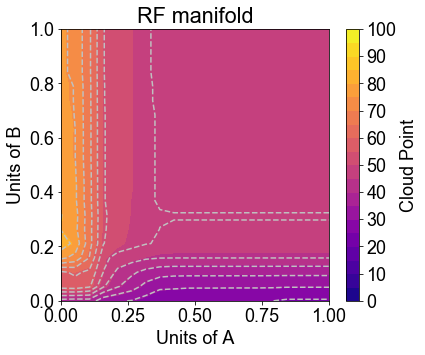

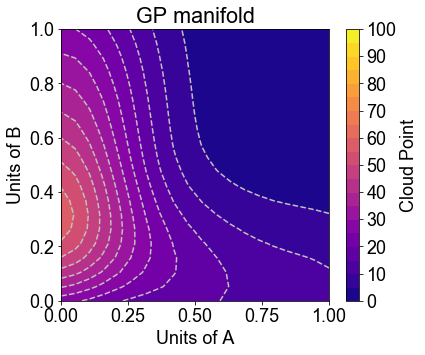

In [81]:
fig1 = plt.figure(figsize=(6,5))
plt.rcParams.update({'font.size': 18})
plt.contourf(gx1, gx2, np.mean(RF_y.reshape(20,20,20),axis=-1),np.linspace(0,100,21),cmap='plasma')
cbar = plt.colorbar(ticks= np.linspace(0,100,11))
cbar.set_label('Cloud Point')
plt.contour(gx1, gx2, np.mean(mesh_y.reshape(20,20,20),axis=-1),np.linspace(0,100,21), linestyles='dashed',colors='silver')
plt.xlabel('Units of A')
plt.ylabel('Units of B')
plt.title ('RF manifold')

fig2 = plt.figure(figsize=(6,5))
plt.rcParams.update({'font.size': 18})
plt.contourf(gx1, gx2, np.mean(GP_y.reshape(20,20,20),axis=-1),np.linspace(0,100,21),cmap='plasma')
cbar = plt.colorbar(ticks= np.linspace(0,100,11))
cbar.set_label('Cloud Point')
plt.contour(gx1, gx2, np.mean(GP_y.reshape(20,20,20),axis=-1),np.linspace(0,100,21), linestyles='dashed',colors='silver')
plt.xlabel('Units of A')
plt.ylabel('Units of B')
plt.title ('GP manifold')